In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv("/content/Algerian_forest_fire_cleaned_dataset (2)")

In [47]:
df1=df

In [48]:
df1.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1.0,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2.0,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3.0,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4.0,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5.0,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


#I don't want unamed,day,month year columns because we are focusing on remaining features..! So,I try to delete these unamed,day,month year
features..!

#For Classification we will keep Classes column as Dependent feature
#but as of now, we are doing regression we will keep FWI as Dependent feature.

In [7]:
df = df.drop(['Unnamed: 0','day','month','year'], axis=1)

In [8]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


#Exploratory Data Analysis


#This is probelm where only '1' came for not fire and fire total valuecount is 0 actually we have fire also in data it has to come '1' and notfire has to come with '0'
# so for this we use str.contains()

In [9]:
#Encoding categorical data #Classes feature have "not fire" and "fire"
#I want convert to '0' and '1'
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [11]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


#Plotting my data

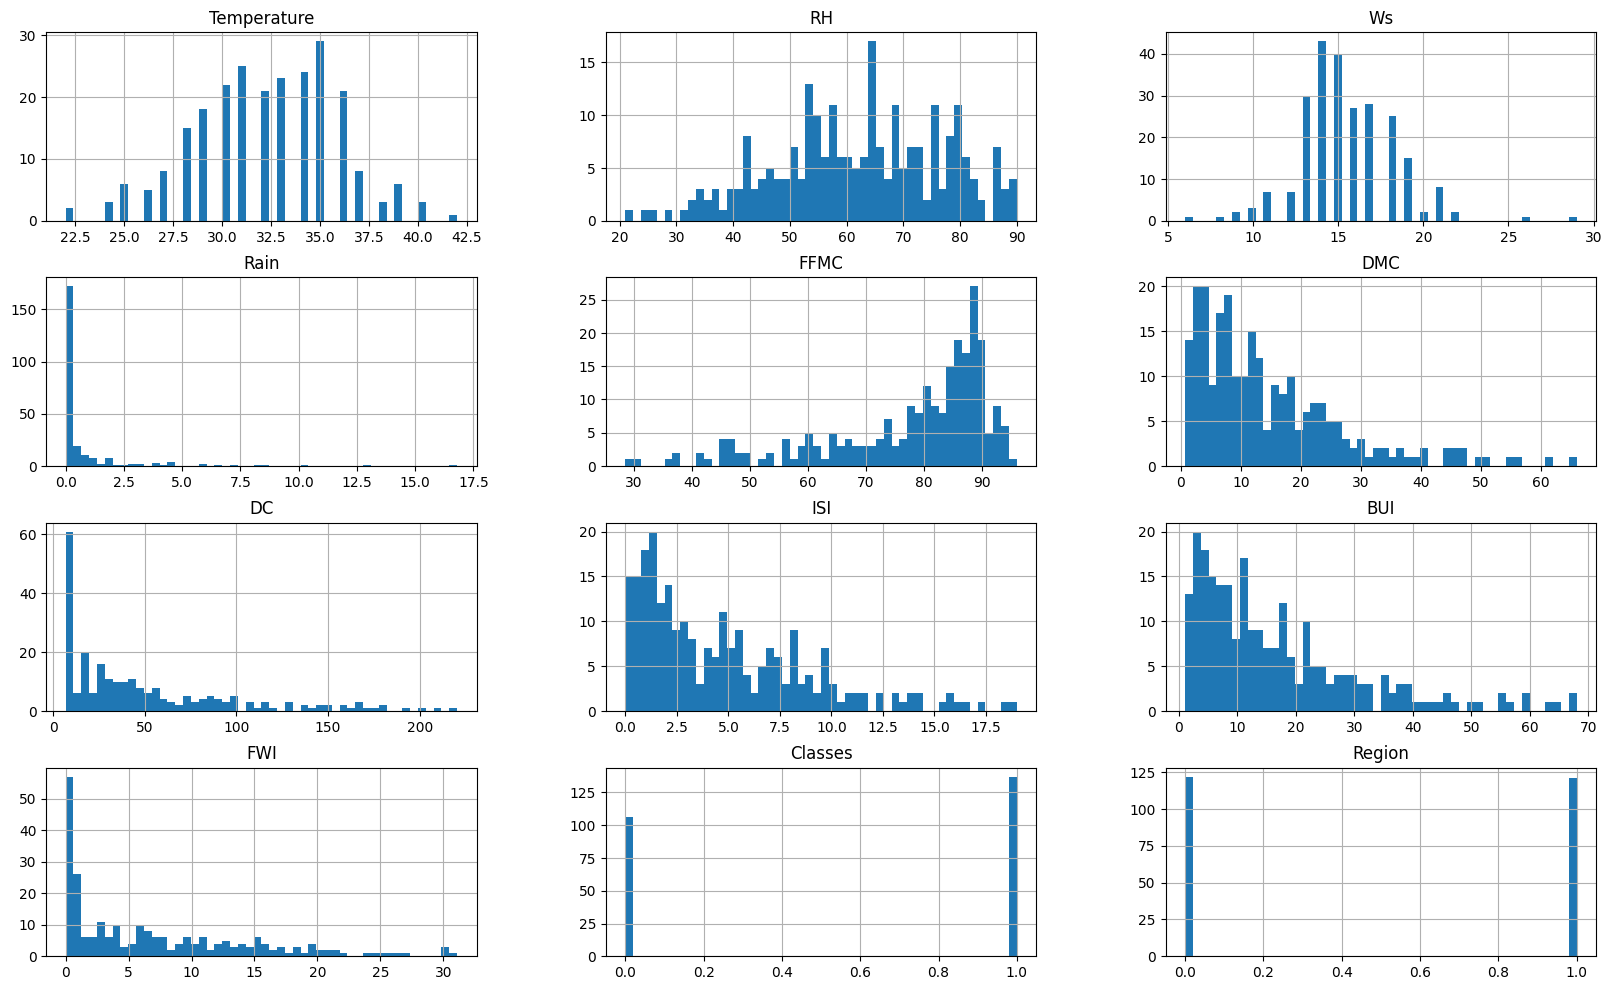

In [15]:
# plt.style.use('sns')
df.hist(bins=50,figsize=(20,12))
plt.show()

In [16]:
##Precentage of pie chart
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [20]:
#I want this counts in percentages
percent = df['Classes'].value_counts(normalize=True)*100
percent

,proportion
Classes,
1,56.378601
0,43.621399


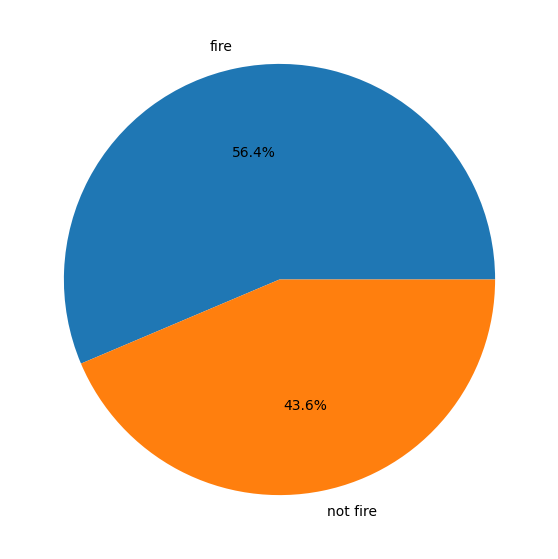

In [37]:
#Ploting pie chart
# Example of corrected code
class_labels = ['fire', 'not fire']
plt.figure(figsize=(20, 7))
plt.pie(percent, labels=class_labels, autopct='%1.1f%%')
plt.show()




In [42]:
##Corr()
hea= df.corr()
hea

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

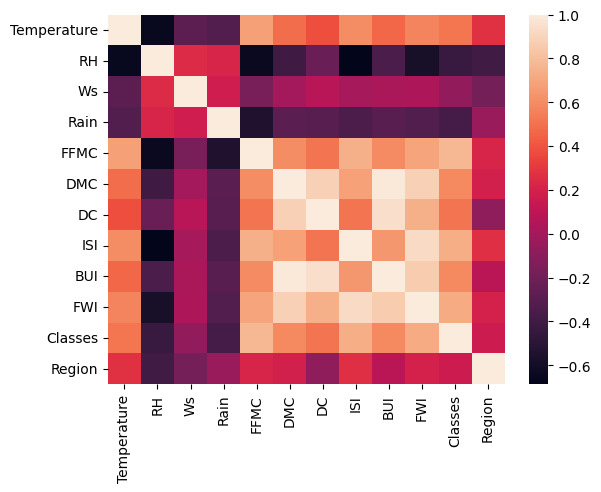

In [43]:
#showing correlation features in heatmaps
sns.heatmap(hea)

<Axes: ylabel='FWI'>

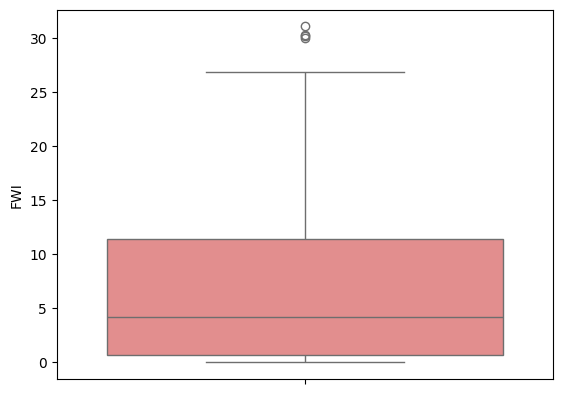

In [45]:
#to check outliers we use boxplots
sns.boxplot(df['FWI'], color='lightcoral')

In [53]:
#Encoding
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fired','fired')

Text(0.5, 1.0, 'Fire Analysis for Sidi-Bell Region')

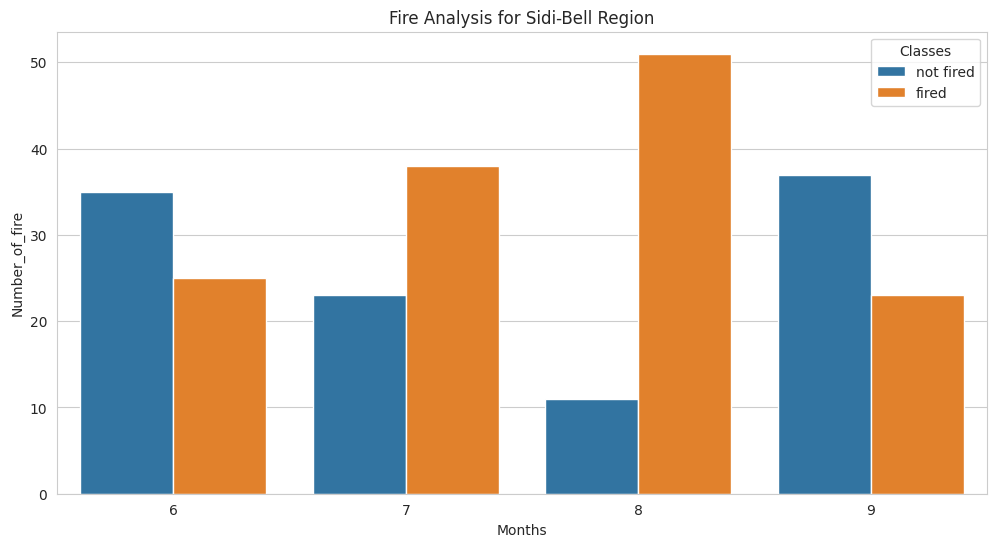

In [60]:
#monthly fire analysis
df_temp = df1.loc[df1['Region']==1]
plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df1)
plt.ylabel('Number_of_fire')
plt.xlabel("Months")
plt.title("Fire Analysis for Sidi-Bell Region")


#Maximum Fire got increased and Occured in 08-August Month
#Low Fire got occured in 09-September Month
#For Sidi-Bell Region

Text(0.5, 1.0, 'Fire Analysis for Beijia Region')

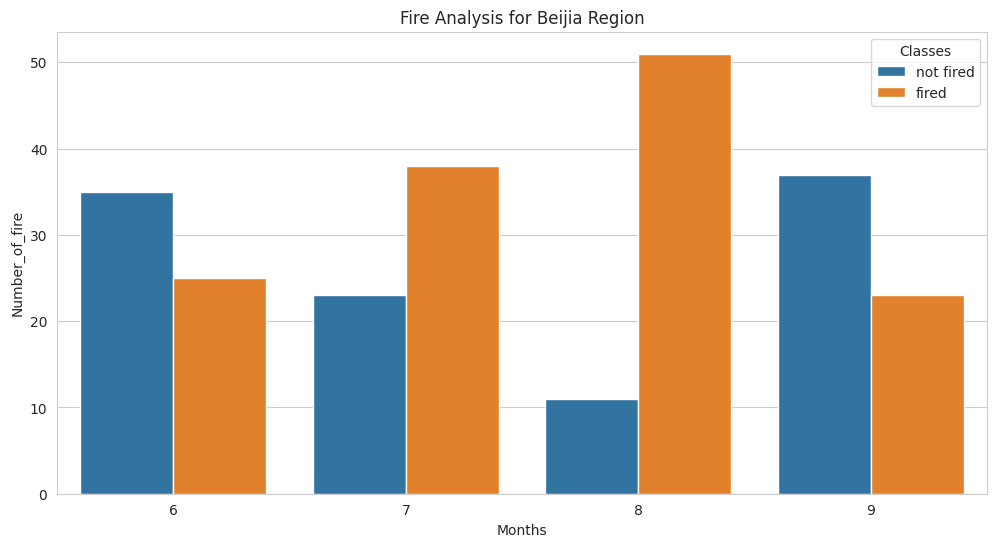

In [61]:
#monthly fire analysis
df_temp = df1.loc[df1['Region']==-0]
plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df1)
plt.ylabel('Number_of_fire')
plt.xlabel("Months")
plt.title("Fire Analysis for Beijia Region")

#Maximum Fire got increased and Occured in 08-August Month
#Low Fire got occured in 09-September Month
#For  Beijia Region

<Axes: xlabel='month', ylabel='Temperature'>

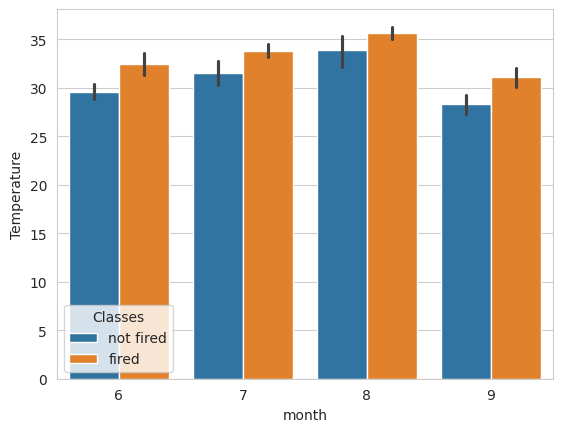

In [71]:
#Temperature analysis for Years
sns.barplot(x='month',y='Temperature',hue='Classes',data=df1)


#When fire occured 8-August month having High Temperature 38C
#When not fire 8-August month having High Temperature 33C
#When fire occured 9-September month having Low Temperature 32C
#When not fire 8-August month having High Temperature 326C